<center>
    # How to export a tab file and save your data using the brightwind library
</center>

***

In [1]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 26 June, 2019


***
## Outline:

This guide will demonstrate how to get some useful statistics from a sample dataset using the following steps:

- Import the brightwind library and some sample data
- Plot a wind rose and produce a frequency table
- Export the frequency table to a tab file for use in WASP or Openwind
- Export the site data to a csv file

***

In [2]:
import brightwind as bw

In [3]:
# specify location of existing sample dataset
filepath = r'C:\...\brightwind\datasets\demo\demo_data.csv'
# load data as dataframe
data = bw.load_csv(filepath) 
# show first few rows of dataframe
data.head(5)

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


### Plot a wind rose and produce a frequency distribution table

In order to export a tab file in the traditional format suitable for use in WASP or Openwind, it is first necessary to produce a frequency table using your desired anemometer and wind vane data. The brightwind library makes this simple. In the example below we pass the 80m anemometer and the 78m wind vane to the `freq_table()` function. This automatically returns a nice wind rose plot of the site.

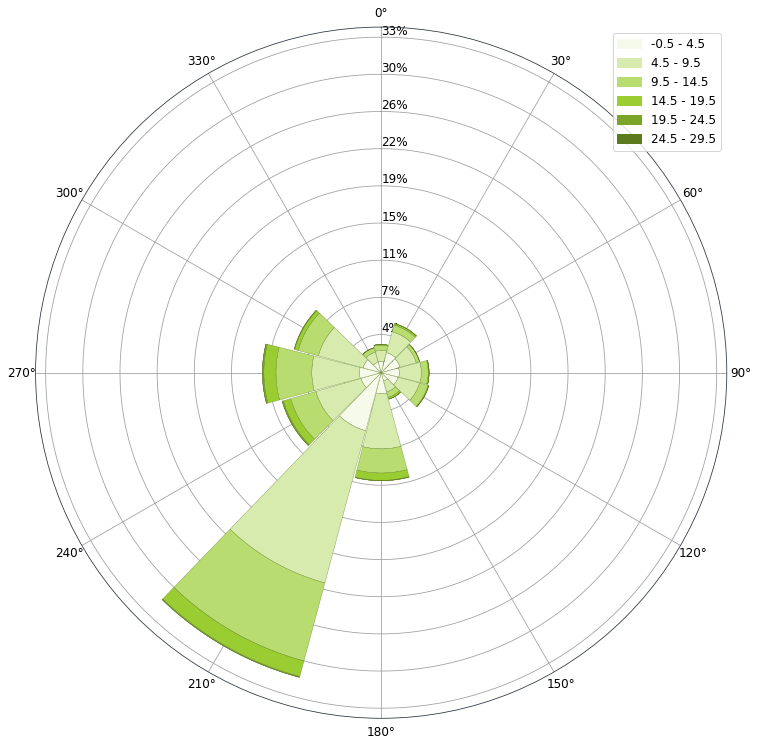

In [4]:
bw.freq_table(data.Spd80mN,data.Dir78mS)

We want to return the data underpinning the windrose, i.e. the frequency table. To do this, we have to set the return_data variable to True in the function, and then set the function equal to a variable that represents the plot (Wind_rose) and the data (freq_table). The freq_table is then called for viewing.

In [5]:
Wind_rose, freq_table = bw.freq_table(data.Spd80mN,data.Dir78mS,return_data=True)

In [6]:
freq_table

,345.0-15.0,15.0-45.0,45.0-75.0,75.0-105.0,105.0-135.0,135.0-165.0,165.0-195.0,195.0-225.0,225.0-255.0,255.0-285.0,285.0-315.0,315.0-345.0
variable_bin,,,,,,,,,,,,
"[-0.5, 0.5)",0.041828,0.084702,0.097251,0.099342,0.126531,0.048103,0.113982,0.209142,0.126531,0.074245,0.039737,0.072154
"[0.5, 1.5)",0.180907,0.226919,0.245741,0.270838,0.278158,0.157902,0.206004,0.566774,0.229010,0.159993,0.181953,0.170450
"[1.5, 2.5)",0.271884,0.483117,0.531220,0.433969,0.422466,0.240513,0.421420,1.230798,0.419329,0.401552,0.363906,0.287570
"[2.5, 3.5)",0.312667,0.615922,0.582459,0.454883,0.422466,0.220644,0.504031,1.679407,0.626379,0.667162,0.542722,0.278158
"[3.5, 4.5)",0.330444,0.655659,0.500894,0.551088,0.479980,0.204959,0.847023,2.290100,0.690167,0.858526,0.735133,0.283387
"[4.5, 5.5)",0.284433,0.565728,0.472660,0.527037,0.455929,0.217507,1.159690,2.806680,0.839703,0.853298,0.849115,0.277113
"[5.5, 6.5)",0.292798,0.509260,0.413055,0.511351,0.472660,0.214370,1.303998,3.112027,1.035251,0.932771,0.971463,0.215416
"[6.5, 7.5)",0.253061,0.378546,0.319987,0.459066,0.446517,0.238421,1.175376,3.520898,1.076033,1.040479,0.961006,0.180907
"[7.5, 8.5)",0.155810,0.365998,0.269793,0.392140,0.495666,0.250970,1.005971,3.303391,0.974600,0.998651,0.926497,0.196593


### Export a tab file

Once a frequency table has been generated, producing a tab file is just one line of code. The `export_tab_file()` function requires the frequency table (freq_table) as an input, along with the height above ground level of the distribution (80m), and the latitude (56) and longitude (-4) coordinates of the site. The filename is specified by setting the file_name variable. The tab file will be outputted in the folder containing the jupyter notebook. The folder_path variable can be set if the user would like to export the tab file to another folder.

In [7]:
bw.export_tab_file(freq_table,80,56,-4,file_name='Irish_Site_1')

Export of tab file successful.


### Export the site data to a csv file

To export the data to a location of your choice, simply pass the dataframe representing the site data into the `export_csv()` function and set the file_name variable to your name of choice. This will output the data into a file in the same folder as your jupyter notebook. The folder_path variable can be set if the user would like to export the data to another folder.

In [8]:
bw.export_csv(data,file_name='Demo_data.csv')

Export to csv successful.
